*Imports*

In [1]:
from IPython.core.display import display, HTML; display(HTML("<style>.container{width:90% !important;}</style>")) 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import time

# Patient Survival Prediction - MODELING -part 2

### *Importing data and columns names for transformer* 

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
cat_col = pd.read_csv('cat_col.csv')['0'].tolist()

In [5]:
num_col = pd.read_csv('num_col.csv')['0'].tolist()

*Let's make train and test sets*

In [6]:
y = data.hospital_death

In [7]:
X = data.drop('hospital_death',axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

 *Let's use a transformers for preprocessing of our data*

In [9]:
preprocess_pipeline = ColumnTransformer(transformers=
                                        [('num', SimpleImputer(strategy='median'),num_col),
                                        ('cat',OneHotEncoder(),cat_col)]
                                       )

*The data has a lot of dimensions, I used PCA to reduce for faster calculations.*

In [10]:
salcer = StandardScaler()

In [11]:
X_transform = preprocess_pipeline.fit_transform(X)

In [12]:
X_scaled = salcer.fit_transform(X_transform)

In [13]:
from sklearn.decomposition import PCA
pca=PCA()

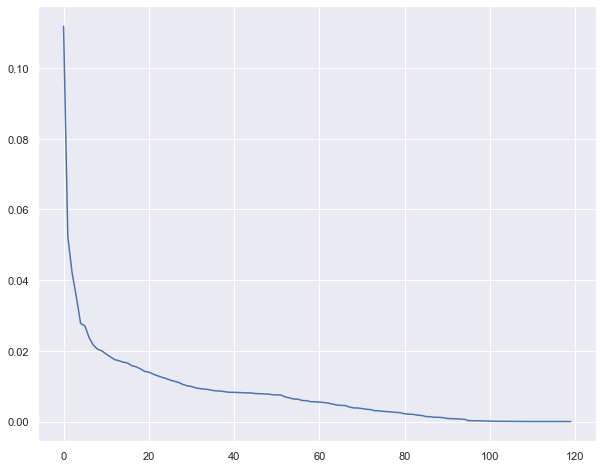

In [66]:
pca.fit_transform(X_scaled)
explained_variance_s=pca.explained_variance_ratio_
plt.figure(figsize=(10,8))
_=plt.plot(explained_variance_s)

*check the total explained variance ratio using different number of principal components*

In [15]:
num_components = [2,3,4,5,6,10,20,30,40,50,60,70,80,90,100,120]
for comp in num_components:
    pca = PCA(n_components=comp)
    X_train_pca = pca.fit_transform(X_scaled)
    print('Total Explained Variance Ratio using {} components = {}%'.format(comp,round(np.sum(pca.explained_variance_ratio_)*100,2)))

Total Explained Variance Ratio using 2 components = 16.42%
Total Explained Variance Ratio using 3 components = 20.62%
Total Explained Variance Ratio using 4 components = 24.15%
Total Explained Variance Ratio using 5 components = 26.93%
Total Explained Variance Ratio using 6 components = 29.63%
Total Explained Variance Ratio using 10 components = 38.2%
Total Explained Variance Ratio using 20 components = 54.66%
Total Explained Variance Ratio using 30 components = 66.59%
Total Explained Variance Ratio using 40 components = 75.55%
Total Explained Variance Ratio using 50 components = 83.61%
Total Explained Variance Ratio using 60 components = 90.15%
Total Explained Variance Ratio using 70 components = 94.84%
Total Explained Variance Ratio using 80 components = 97.86%
Total Explained Variance Ratio using 90 components = 99.47%
Total Explained Variance Ratio using 100 components = 99.95%
Total Explained Variance Ratio using 120 components = 100.0%


*I noticed that 60 commponents make 90%~~ total explained variation ratio.*

# SUPERVISED LEARNING

###### Supervised learning

I will use the following models.

* *LogisticRegression*
* *LinearSVC*
* *SVC*
* *KNeighborsClassifier*
* *DecisionTreeClassifier*
* *RandomForestClassifier*
* *BaggingClassifier*
* *ExtraTreesClassifier*
* *AdaBoostClassifier*
* *GradientBoostingClassifier*
* *VotingClassifier*
* *xgboost.XGBClassifier*
* *DummyClassifier*


* *MLP Classifier*
* *Sequential model*



In [16]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier 
from xgboost.sklearn import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

In [17]:
from sklearn import  metrics

Let's prepare list of models for test

In [18]:
estimators = [
    ('lr',LogisticRegression()),
    ('dtc',DecisionTreeClassifier()),    
    ('rfc',RandomForestClassifier()),
    ('knc',KNeighborsClassifier())]

classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    VotingClassifier(estimators=estimators),
    DummyClassifier(strategy='stratified'),
    BaggingClassifier(DecisionTreeClassifier(),
                                  max_samples=0.7,
                                   bootstrap=True),
    XGBClassifier(),
    LinearSVC(),
    SVC(),   
    KNeighborsClassifier(2),
    DecisionTreeClassifier(),
    MLPClassifier((64,32,16),max_iter=1000),
   
]

oversamples=[None,SMOTE()]


In [19]:
labels= ["LR",
    "RandomForest",
    "ExtraTrees",
     "AdaBoost",
     "GradientBoosting",
    "Votingr",
    "Dummy",
    "Bagging",
    "XGB",
    "LinearSVC",
    "SVC",   
    "KNeighbors",
    "DecisionTree",
    "MLP"
        ]
        
   

Let's test the models

In [20]:
score = []
oversampling = []
names = []
precision_score = []
recall_score = []
f1_score = []
accuracy_score = []

time_ = []
i=0
for classifier in classifiers:    
    i=i+1
    for over in oversamples: 
    
        clf = Pipeline(steps=[("preprocessor", preprocess_pipeline),('scaler',StandardScaler()),('over',over),('pca',PCA(n_components=60)),("classifier", classifier),])
        start_time = time.time()
        clf.fit(X_train, y_train)   
        end_time = time.time()
            
        precision_score.append(metrics.precision_score(y_test, clf.predict(X_test)))
        recall_score.append(metrics.recall_score(y_test, clf.predict(X_test)))
        f1_score.append( metrics.f1_score(y_test, clf.predict(X_test)))
        accuracy_score.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
        names.append(f'{labels[i-1]}')
        oversampling.append(f'{over}')        
        time_.append(f'{round(end_time-start_time,2)}s')
            
            
        

d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'oversampling': oversampling,
     
     'time':time_
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=names
                                        )
df



C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Daniel\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
0,LR,0.645652,0.250105,0.360546,0.923421,None,1.6s
1,LR,0.264577,0.785263,0.395798,0.793051,SMOTE(),3.08s
2,RandomForest,0.755102,0.155789,0.258290,0.922767,None,68.48s
3,RandomForest,0.446436,0.450947,0.448680,0.904340,SMOTE(),93.08s
4,ExtraTrees,0.802548,0.106105,0.187430,0.920586,None,11.51s
5,ExtraTrees,0.518662,0.339368,0.410283,0.915788,SMOTE(),25.54s
6,AdaBoost,0.596663,0.256000,0.358279,0.920840,None,26.84s
7,AdaBoost,0.249247,0.731368,0.371789,0.786654,SMOTE(),52.44s
8,GradientBoosting,0.653364,0.241263,0.352399,0.923457,None,129.92s
9,GradientBoosting,0.266205,0.776421,0.396474,0.795958,SMOTE(),255.26s


In [21]:
df.describe()

,precision_score,recall_score,f1_score,accuracy_score
count,28.000000,28.000000,28.000000,28.000000
mean,0.446305,0.383895,0.329281,0.865615
std,0.214610,0.216410,0.091580,0.086428
min,0.083827,0.079579,0.084590,0.498910
25%,0.279085,0.198947,0.296410,0.847341
50%,0.378405,0.349895,0.359413,0.890710
75%,0.630842,0.489684,0.395967,0.921258
max,0.802548,0.785263,0.448680,0.924766


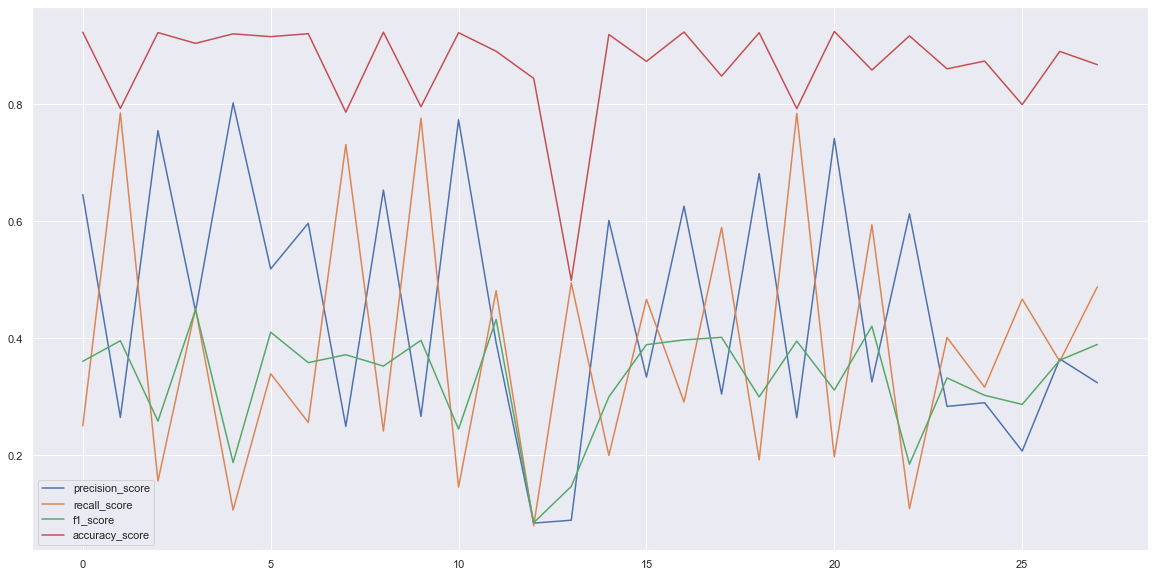

In [56]:
_=df.plot(figsize=(20,10))

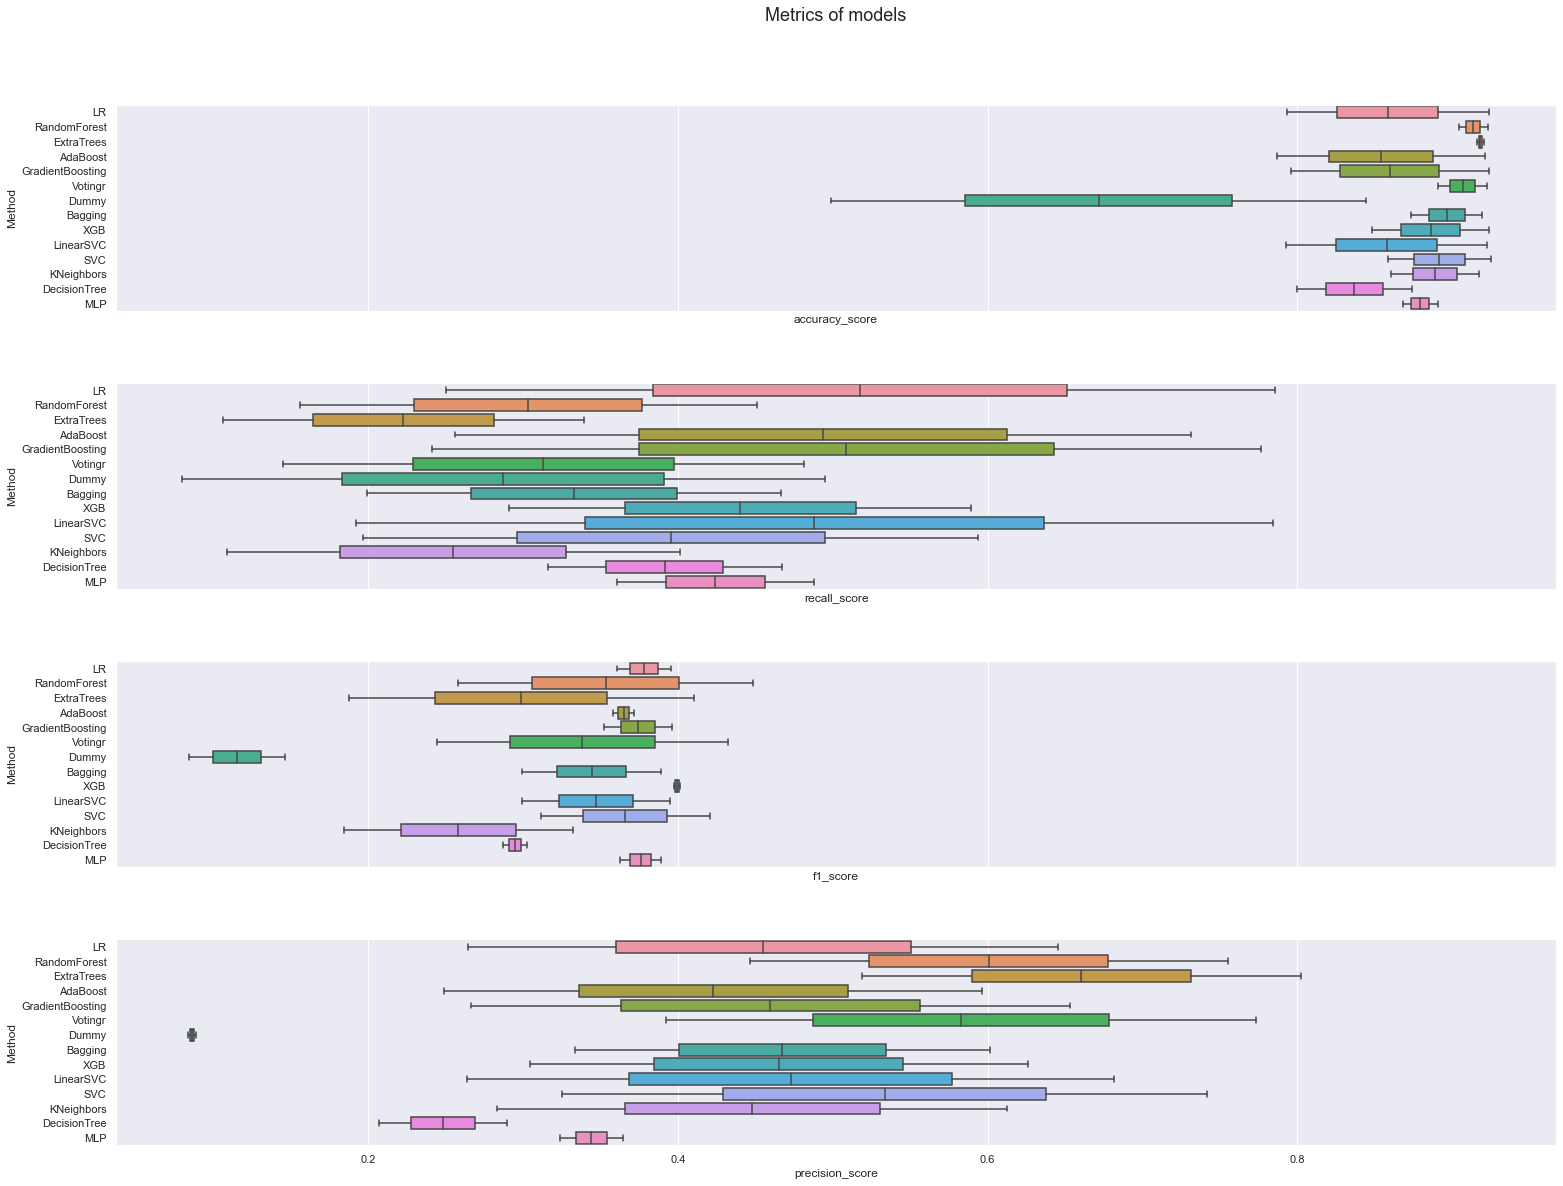

In [43]:
fig, axes = plt.subplots(figsize=(25, 17), sharex=True, sharey=True, nrows=4,)

sns.boxplot(data=df, x='accuracy_score', y='Method',ax=axes[0])
sns.boxplot(data=df, x='recall_score', y='Method',ax=axes[1])
sns.boxplot(data=df, x='f1_score', y='Method',ax=axes[2])
sns.boxplot(data=df, x='precision_score', y='Method',ax=axes[3])


plt.suptitle("Metrics of models", fontsize=18)
    
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.9, wspace=0.15, hspace=0.35)

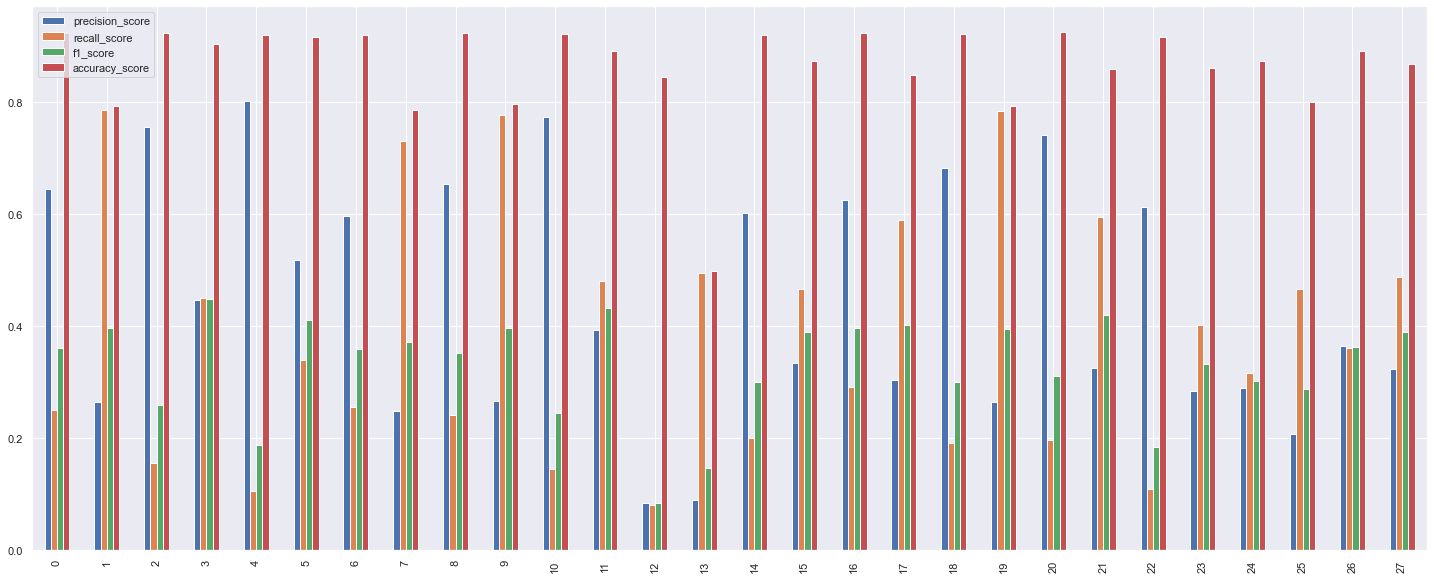

In [52]:
_=df.plot(kind='bar',figsize=(25,10))


In [67]:
df[(df['recall_score']>0.4)&(df['precision_score']>0.4)]

,Method,precision_score,recall_score,f1_score,accuracy_score,oversampling,time
3,RandomForest,0.446436,0.450947,0.44868,0.90434,SMOTE(),93.08s


# NEUTRAL NETWORK

## Sequential

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.regularizers import l2


*I have to again make a training split for the Sequential model because I can not attach pre processing pipeline to do it automatically.*

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.3,stratify=y)

In [26]:
X_train = salcer.fit_transform(X_train)
X_test = salcer.fit_transform(X_test)

In [27]:
def create_model( layer_1,layer_2,layer_3,layer_4, dropout=0.0,regu=0.0):
    optimizer='adam'
    init='glorot_uniform'
    
    
    reg = l2(regu)
    
    model = Sequential()   
    
    model.add(Dense(layer_1,input_dim=X_train.shape[1],activation='relu',kernel_initializer=init))
    
    model.add(Dense(layer_2,activation='relu',kernel_regularizer=reg,kernel_initializer=init))
    model.add(Dropout(dropout))
    
    model.add(Dense(layer_3,activation='relu',kernel_regularizer=reg,kernel_initializer=init))
    model.add(Dropout(dropout))
    
    model.add(Dense(layer_4,activation='relu',kernel_regularizer=reg,kernel_initializer=init))
    model.add(Dropout(dropout))
    
    model.add(Dense(1,activation='sigmoid',kernel_regularizer=reg,kernel_initializer=init))
    
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["accuracy",Recall(),Precision()])
    
    return model


In [28]:
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

Let's prepare models for testing

In [40]:
models = [create_model(512,256,128,64,dropout=0.25,regu=0.001),
          create_model(256,128,64,32,dropout=0.25,regu=0.001),
          create_model(128,64,32,24,dropout=0.25,regu=0.001),
          create_model(64,32,16,8,dropout=0.25,regu=0.001),
         ] 


In [41]:
acc = []
prec= []
f1=[]
recall=[]
model_name=[]


for model in models:    
    model.fit(X_train,y_train,epochs=100,callbacks=[early_stopping],validation_batch_size=0.1,
          verbose=2)
    x_test = []
    for i in model.predict(X_test):
        if i > 0.5:
            x_test.append(1)
        else:
            x_test.append(0)
    prec.append(metrics.precision_score(y_test, x_test))
    recall.append(metrics.recall_score(y_test,x_test))
    f1.append( metrics.f1_score(y_test, x_test))
    acc.append(metrics.accuracy_score(y_test,x_test))
    model_name.append(model.name)
    
        
dd = {'precision_score': prec, 
     'recall_score': recall, 
     'f1_score': f1,
     'accuracy_score' : acc,
     }

df_n = pd.DataFrame(data=dd)
df_n.insert(loc=0, column='Method', value=model_name
                                        )
df_n
    

Epoch 1/100
2007/2007 - 5s - loss: 0.3109 - accuracy: 0.9220 - recall_4: 0.2202 - precision_4: 0.6391 - 5s/epoch - 2ms/step
Epoch 2/100
2007/2007 - 4s - loss: 0.2167 - accuracy: 0.9248 - recall_4: 0.2711 - precision_4: 0.6562 - 4s/epoch - 2ms/step
Epoch 3/100
2007/2007 - 4s - loss: 0.2117 - accuracy: 0.9263 - recall_4: 0.2928 - precision_4: 0.6661 - 4s/epoch - 2ms/step
Epoch 4/100
2007/2007 - 4s - loss: 0.2078 - accuracy: 0.9279 - recall_4: 0.3085 - precision_4: 0.6822 - 4s/epoch - 2ms/step
Epoch 5/100
2007/2007 - 4s - loss: 0.2044 - accuracy: 0.9292 - recall_4: 0.3343 - precision_4: 0.6836 - 4s/epoch - 2ms/step
Epoch 6/100
2007/2007 - 4s - loss: 0.2017 - accuracy: 0.9302 - recall_4: 0.3444 - precision_4: 0.6913 - 4s/epoch - 2ms/step
Epoch 7/100
2007/2007 - 4s - loss: 0.1983 - accuracy: 0.9324 - recall_4: 0.3666 - precision_4: 0.7096 - 4s/epoch - 2ms/step
Epoch 8/100
2007/2007 - 4s - loss: 0.1959 - accuracy: 0.9330 - recall_4: 0.3825 - precision_4: 0.7070 - 4s/epoch - 2ms/step
Epoch 9/

Epoch 67/100
2007/2007 - 4s - loss: 0.0862 - accuracy: 0.9809 - recall_4: 0.8594 - precision_4: 0.9147 - 4s/epoch - 2ms/step
Epoch 68/100
2007/2007 - 4s - loss: 0.0866 - accuracy: 0.9811 - recall_4: 0.8661 - precision_4: 0.9103 - 4s/epoch - 2ms/step
Epoch 69/100
2007/2007 - 4s - loss: 0.0847 - accuracy: 0.9809 - recall_4: 0.8655 - precision_4: 0.9083 - 4s/epoch - 2ms/step
Epoch 70/100
2007/2007 - 4s - loss: 0.0862 - accuracy: 0.9805 - recall_4: 0.8661 - precision_4: 0.9039 - 4s/epoch - 2ms/step
Epoch 71/100
2007/2007 - 4s - loss: 0.0844 - accuracy: 0.9828 - recall_4: 0.8773 - precision_4: 0.9194 - 4s/epoch - 2ms/step
Epoch 72/100
2007/2007 - 4s - loss: 0.0849 - accuracy: 0.9819 - recall_4: 0.8724 - precision_4: 0.9140 - 4s/epoch - 2ms/step
Epoch 73/100
2007/2007 - 4s - loss: 0.0834 - accuracy: 0.9817 - recall_4: 0.8727 - precision_4: 0.9112 - 4s/epoch - 2ms/step
Epoch 74/100
2007/2007 - 4s - loss: 0.0817 - accuracy: 0.9829 - recall_4: 0.8819 - precision_4: 0.9172 - 4s/epoch - 2ms/step


Epoch 33/100
2007/2007 - 3s - loss: 0.1395 - accuracy: 0.9599 - recall_5: 0.6298 - precision_5: 0.8694 - 3s/epoch - 1ms/step
Epoch 34/100
2007/2007 - 3s - loss: 0.1376 - accuracy: 0.9602 - recall_5: 0.6287 - precision_5: 0.8756 - 3s/epoch - 1ms/step
Epoch 35/100
2007/2007 - 3s - loss: 0.1375 - accuracy: 0.9601 - recall_5: 0.6287 - precision_5: 0.8738 - 3s/epoch - 1ms/step
Epoch 36/100
2007/2007 - 3s - loss: 0.1351 - accuracy: 0.9616 - recall_5: 0.6397 - precision_5: 0.8825 - 3s/epoch - 1ms/step
Epoch 37/100
2007/2007 - 3s - loss: 0.1340 - accuracy: 0.9625 - recall_5: 0.6469 - precision_5: 0.8878 - 3s/epoch - 1ms/step
Epoch 38/100
2007/2007 - 3s - loss: 0.1323 - accuracy: 0.9629 - recall_5: 0.6500 - precision_5: 0.8900 - 3s/epoch - 1ms/step
Epoch 39/100
2007/2007 - 3s - loss: 0.1308 - accuracy: 0.9629 - recall_5: 0.6477 - precision_5: 0.8934 - 3s/epoch - 1ms/step
Epoch 40/100
2007/2007 - 3s - loss: 0.1306 - accuracy: 0.9632 - recall_5: 0.6478 - precision_5: 0.8968 - 3s/epoch - 1ms/step


Epoch 99/100
2007/2007 - 3s - loss: 0.0869 - accuracy: 0.9763 - recall_5: 0.8217 - precision_5: 0.8952 - 3s/epoch - 1ms/step
Epoch 100/100
2007/2007 - 3s - loss: 0.0865 - accuracy: 0.9768 - recall_5: 0.8267 - precision_5: 0.8966 - 3s/epoch - 1ms/step
Epoch 1/100
2007/2007 - 3s - loss: 0.2975 - accuracy: 0.9194 - recall_6: 0.1572 - precision_6: 0.6325 - 3s/epoch - 1ms/step
Epoch 2/100
2007/2007 - 2s - loss: 0.2240 - accuracy: 0.9240 - recall_6: 0.2516 - precision_6: 0.6560 - 2s/epoch - 1ms/step
Epoch 3/100
2007/2007 - 2s - loss: 0.2139 - accuracy: 0.9249 - recall_6: 0.2718 - precision_6: 0.6562 - 2s/epoch - 1ms/step
Epoch 4/100
2007/2007 - 2s - loss: 0.2077 - accuracy: 0.9266 - recall_6: 0.3018 - precision_6: 0.6640 - 2s/epoch - 1ms/step
Epoch 5/100
2007/2007 - 2s - loss: 0.2058 - accuracy: 0.9280 - recall_6: 0.3099 - precision_6: 0.6816 - 2s/epoch - 1ms/step
Epoch 6/100
2007/2007 - 2s - loss: 0.2023 - accuracy: 0.9282 - recall_6: 0.3143 - precision_6: 0.6822 - 2s/epoch - 1ms/step
Epoch

Epoch 65/100
2007/2007 - 2s - loss: 0.1358 - accuracy: 0.9587 - recall_6: 0.6027 - precision_6: 0.8812 - 2s/epoch - 1ms/step
Epoch 66/100
2007/2007 - 2s - loss: 0.1328 - accuracy: 0.9587 - recall_6: 0.5980 - precision_6: 0.8863 - 2s/epoch - 1ms/step
Epoch 67/100
2007/2007 - 2s - loss: 0.1337 - accuracy: 0.9592 - recall_6: 0.6032 - precision_6: 0.8876 - 2s/epoch - 1ms/step
Epoch 68/100
2007/2007 - 2s - loss: 0.1340 - accuracy: 0.9589 - recall_6: 0.5982 - precision_6: 0.8894 - 2s/epoch - 1ms/step
Epoch 69/100
2007/2007 - 2s - loss: 0.1325 - accuracy: 0.9585 - recall_6: 0.5995 - precision_6: 0.8821 - 2s/epoch - 1ms/step
Epoch 70/100
2007/2007 - 2s - loss: 0.1335 - accuracy: 0.9593 - recall_6: 0.6042 - precision_6: 0.8892 - 2s/epoch - 1ms/step
Epoch 71/100
2007/2007 - 2s - loss: 0.1321 - accuracy: 0.9598 - recall_6: 0.6096 - precision_6: 0.8892 - 2s/epoch - 1ms/step
Epoch 72/100
2007/2007 - 2s - loss: 0.1312 - accuracy: 0.9592 - recall_6: 0.6045 - precision_6: 0.8864 - 2s/epoch - 1ms/step


Epoch 31/100
2007/2007 - 2s - loss: 0.1804 - accuracy: 0.9361 - recall_7: 0.3904 - precision_7: 0.7487 - 2s/epoch - 920us/step
Epoch 32/100
2007/2007 - 2s - loss: 0.1788 - accuracy: 0.9363 - recall_7: 0.3962 - precision_7: 0.7466 - 2s/epoch - 947us/step
Epoch 33/100
2007/2007 - 2s - loss: 0.1789 - accuracy: 0.9362 - recall_7: 0.3998 - precision_7: 0.7418 - 2s/epoch - 917us/step
Epoch 34/100
2007/2007 - 2s - loss: 0.1781 - accuracy: 0.9364 - recall_7: 0.3917 - precision_7: 0.7522 - 2s/epoch - 901us/step
Epoch 35/100
2007/2007 - 2s - loss: 0.1776 - accuracy: 0.9364 - recall_7: 0.4000 - precision_7: 0.7456 - 2s/epoch - 927us/step
Epoch 36/100
2007/2007 - 2s - loss: 0.1762 - accuracy: 0.9366 - recall_7: 0.4043 - precision_7: 0.7447 - 2s/epoch - 916us/step
Epoch 37/100
2007/2007 - 2s - loss: 0.1771 - accuracy: 0.9374 - recall_7: 0.4096 - precision_7: 0.7523 - 2s/epoch - 924us/step
Epoch 38/100
2007/2007 - 2s - loss: 0.1769 - accuracy: 0.9364 - recall_7: 0.4002 - precision_7: 0.7447 - 2s/epo

Epoch 96/100
2007/2007 - 2s - loss: 0.1576 - accuracy: 0.9455 - recall_7: 0.4834 - precision_7: 0.8074 - 2s/epoch - 895us/step
Epoch 97/100
2007/2007 - 2s - loss: 0.1586 - accuracy: 0.9453 - recall_7: 0.4796 - precision_7: 0.8081 - 2s/epoch - 899us/step
Epoch 98/100
2007/2007 - 2s - loss: 0.1577 - accuracy: 0.9452 - recall_7: 0.4809 - precision_7: 0.8058 - 2s/epoch - 896us/step
Epoch 99/100
2007/2007 - 2s - loss: 0.1568 - accuracy: 0.9452 - recall_7: 0.4807 - precision_7: 0.8062 - 2s/epoch - 896us/step
Epoch 100/100
2007/2007 - 2s - loss: 0.1573 - accuracy: 0.9453 - recall_7: 0.4874 - precision_7: 0.8002 - 2s/epoch - 893us/step


,Method,precision_score,recall_score,f1_score,accuracy_score
0,sequential_4,0.445734,0.323368,0.374817,0.906884
1,sequential_5,0.406036,0.373895,0.389303,0.898742
2,sequential_6,0.534545,0.309474,0.392000,0.917133
3,sequential_7,0.513104,0.370947,0.430596,0.915316


In [57]:
df_n

,Method,precision_score,recall_score,f1_score,accuracy_score
0,sequential_4,0.445734,0.323368,0.374817,0.906884
1,sequential_5,0.406036,0.373895,0.389303,0.898742
2,sequential_6,0.534545,0.309474,0.392000,0.917133
3,sequential_7,0.513104,0.370947,0.430596,0.915316


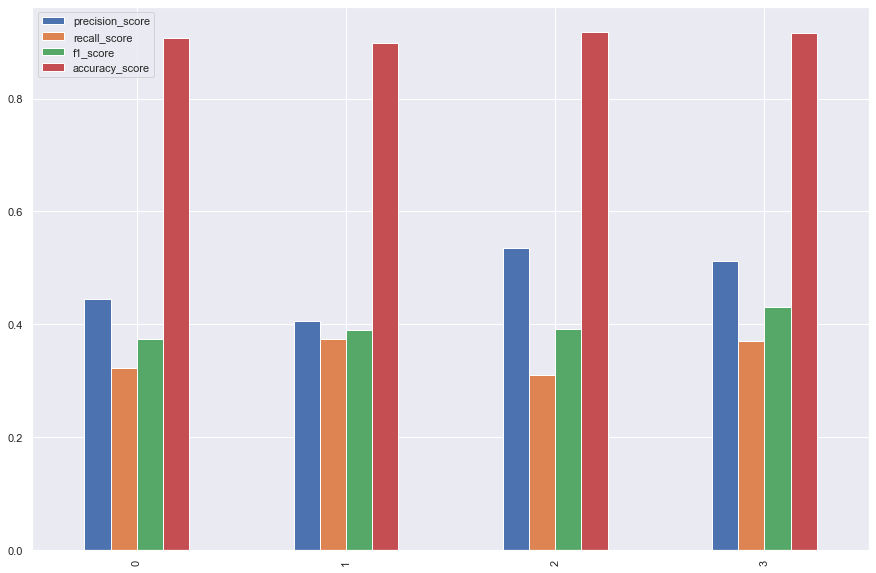

In [60]:

_=df_n.plot(kind='bar',figsize=(15,10))

*result form natural network is very close to resluts of models what we test before*